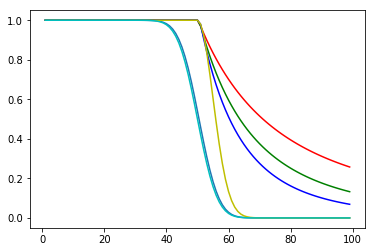

In [17]:

import matplotlib.pyplot as plt
import math
import scipy.stats

E_Sn = 50

c = math.pow(2,100)

def fac(x):
	prod = 1
	i = 1
	while (i<=x):
		prod = prod * i
		i=i+1
	return prod

def combi(n,r):
	return fac(n) * 1.0 / (fac(n-r) * fac(r))

def actual_prob(eps):
	su = 0
	for i in range(eps,100): 
		su = su + combi(100,i)*1.0/c
	return su

def expectation_Sn_power_b(b):
    su = 0
    for i in range(0,100):
        su = su + math.pow(i,b) * (combi(100,i)*1.0/c)
    return su    

def bound_b(eps,b):
    bound_value = expectation_Sn_power_b(b)*1.0/math.pow(eps,b)
    if (bound_value>=1): return 1
    else: return expectation_Sn_power_b(b)*1.0/math.pow(eps,b)
    
def chernoff(eps):
    val =  1.0* math.pow(50,100) / (math.pow(eps,eps) * math.pow(100-eps,100-eps) )
    if eps<=50 or val>=1: return 1
    else: return val

def clt(x):
    return 1.0 - scipy.stats.norm.cdf((x-50)/5.0)
    
    
epsilon_arr = []
actual_prob_arr =[]
bound_arr_2 = []
bound_arr_3 = []
bound_arr_4 = []
chernoff_arr = []
clt_arr = []

b_arr = [2,3,4] 
    
for i in range(1,100) :
    epsilon_arr.append(i)
    actual_prob_arr.append(actual_prob(i))
    bound_arr_2.append(bound_b(i,b_arr[0]))
    bound_arr_3.append(bound_b(i,b_arr[1]))
    bound_arr_4.append(bound_b(i,b_arr[2]))
    chernoff_arr.append(chernoff(i))
    clt_arr.append(clt(i))

plt.plot(epsilon_arr,actual_prob_arr)
plt.plot(epsilon_arr,bound_arr_2,'r')
plt.plot(epsilon_arr,bound_arr_3,'g')
plt.plot(epsilon_arr,bound_arr_4,'b')
plt.plot(epsilon_arr,chernoff_arr,'y')
plt.plot(epsilon_arr,clt_arr,'c')
plt.show()
